In [2]:
#importing required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import string

In [3]:
#reading data
F1=pd.read_csv("C:/Users/Naveen/Desktop/3rd eye data/chefmozaccepts.csv")
F2=pd.read_csv("C:/Users/Naveen/Desktop/3rd eye data/chefmozcuisine.csv")
F3=pd.read_csv("C:/Users/Naveen/Desktop/3rd eye data/chefmozhours4.csv")
F4=pd.read_csv("C:/Users/Naveen/Desktop/3rd eye data/chefmozparking.csv")
F5=pd.read_csv("C:/Users/Naveen/Desktop/3rd eye data/usercuisine.csv")
F6=pd.read_csv("C:/Users/Naveen/Desktop/3rd eye data/userpayment.csv")
F7=pd.read_csv("C:/Users/Naveen/Desktop/3rd eye data/userprofile.csv")
F8=pd.read_csv("C:/Users/Naveen/Desktop/3rd eye data/geoplaces2.csv",encoding="ISO-8859-1")

T=pd.read_csv("C:/Users/Naveen/Desktop/3rd eye data/rating_final.csv")

Now we are going to explore and preprocess each csv files individualy

# F1-chefmozaccepts.csv

In [4]:
F1.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [5]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
placeID     1314 non-null int64
Rpayment    1314 non-null object
dtypes: int64(1), object(1)
memory usage: 20.6+ KB


Text(0,0.5,'count')

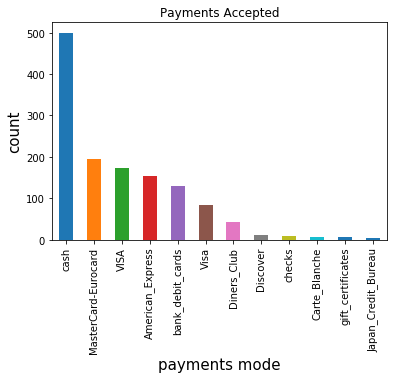

In [6]:
# plot to visualise most accepted payments by Restaurants
F1plt=F1.Rpayment.value_counts().plot.bar(title="Payments Accepted")
F1plt.set_xlabel('payments mode',size=15)
F1plt.set_ylabel('count',size=15)

In [7]:
#creating dummy variables for differen payments.
F1dum = pd.get_dummies(F1,columns=['Rpayment'])
F1dum1 = F1dum.groupby('placeID',as_index=False).sum()
len(F1dum1)

615

In [8]:
F1dum1.head()

,placeID,Rpayment_American_Express,Rpayment_Carte_Blanche,Rpayment_Diners_Club,Rpayment_Discover,Rpayment_Japan_Credit_Bureau,Rpayment_MasterCard-Eurocard,Rpayment_VISA,Rpayment_Visa,Rpayment_bank_debit_cards,Rpayment_cash,Rpayment_checks,Rpayment_gift_certificates
0,132002,1,0,1,0,0,1,0,1,0,0,0,0
1,132012,1,0,1,0,0,0,0,1,1,0,0,0
2,132019,1,0,1,0,0,1,0,1,0,0,0,0
3,132023,1,0,1,0,1,0,0,0,1,0,0,0
4,132024,1,0,1,0,0,0,0,1,1,0,0,0


# F2 - chefmozcuisine.csv

In [9]:
F2.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [10]:
F2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
placeID     916 non-null int64
Rcuisine    916 non-null object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


Text(0,0.5,'count')

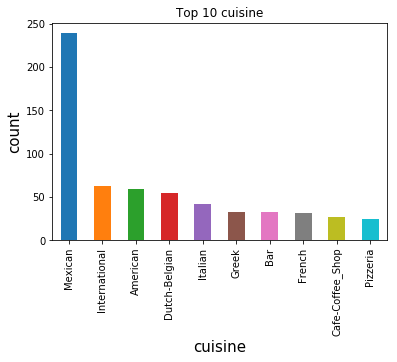

In [11]:
#plot to visualize top cuisines offered by the restaurants
F2plt=F2.Rcuisine.value_counts()[:10].plot.bar(title="Top 10 cuisine")
F2plt.set_xlabel('cuisine',size=15)
F2plt.set_ylabel('count',size=15)

In [12]:
#creating dummy variables for different cuisines.
F2dum = pd.get_dummies(F2,columns=['Rcuisine'])
F2dum1 = F2dum.groupby('placeID',as_index=False).sum()
len(F2dum1)

769

In [13]:
F2dum1.head()

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,132001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,132004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,132005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# F3 - chefmozhours4.csv

In [14]:
F3.head()

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


In [15]:
F3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
placeID    2339 non-null int64
hours      2339 non-null object
days       2339 non-null object
dtypes: int64(1), object(2)
memory usage: 54.9+ KB


# F4 - chefmozparking.csv

In [16]:
F4.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [17]:
F4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
placeID        702 non-null int64
parking_lot    702 non-null object
dtypes: int64(1), object(1)
memory usage: 11.0+ KB


Text(0,0.5,'count')

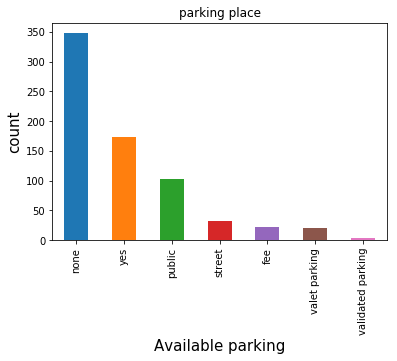

In [18]:
#plot to visualize available parking place at the Restaurants
F4plt=F4.parking_lot.value_counts().plot.bar(title="parking place")
F4plt.set_xlabel('Available parking',size=15)
F4plt.set_ylabel('count',size=15)

In [19]:
#creating dummy variables for different parking lots.
F4dum = pd.get_dummies(F4,columns=['parking_lot'])
F4dum1 = F4dum.groupby('placeID',as_index=False).sum()
len(F4dum1)

675

In [20]:
F4dum1.head()

,placeID,parking_lot_fee,parking_lot_none,parking_lot_public,parking_lot_street,parking_lot_valet parking,parking_lot_validated parking,parking_lot_yes
0,132012,0,0,1,1,0,0,0
1,132023,1,0,1,0,0,0,0
2,132024,0,0,0,1,0,0,0
3,132026,1,0,0,0,0,0,0
4,132030,0,0,0,1,0,0,0


# F5 - usercuisine.csv

In [21]:
F5.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


In [22]:
F5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 2 columns):
userID      330 non-null object
Rcuisine    330 non-null object
dtypes: object(2)
memory usage: 5.2+ KB


Text(0,0.5,'count')

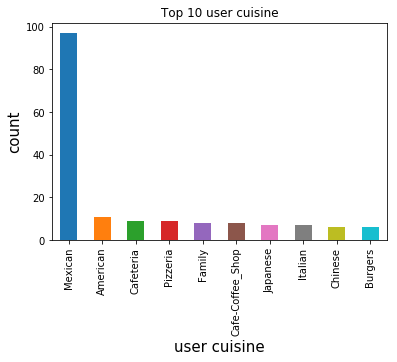

In [23]:
#Top 10 favorite cuisines for the customers
F5plt=F5.Rcuisine.value_counts()[:10].plot.bar(title="Top 10 user cuisine")
F5plt.set_xlabel('user cuisine',size=15)
F5plt.set_ylabel('count',size=15)

In [24]:
#creating dummy variables for differen usercuisines.
F5dum = pd.get_dummies(F5,columns=['Rcuisine'])
F5dum1 = F5dum.groupby('userID',as_index=False).sum()
len(F5dum1)

138

In [25]:
F5dum1.head()

,userID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Australian,Rcuisine_Austrian,Rcuisine_Bagels,Rcuisine_Bakery,...,Rcuisine_Swiss,Rcuisine_Tapas,Rcuisine_Tea_House,Rcuisine_Tex-Mex,Rcuisine_Thai,Rcuisine_Tibetan,Rcuisine_Tunisian,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,U1001,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,U1002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,U1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U1004,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,U1005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# F6 - userpayment.csv

In [26]:
F6.head()

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


In [27]:
F6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
userID      177 non-null object
Upayment    177 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


Text(0,0.5,'count')

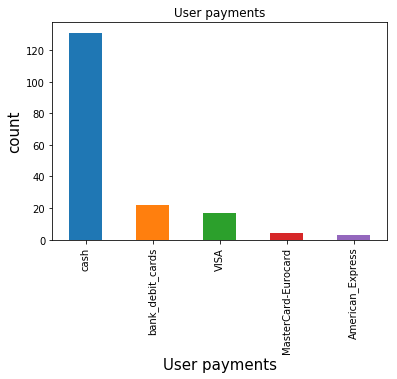

In [28]:
#top type of payments done by the users
F6plt=F6.Upayment.value_counts().plot.bar(title="User payments")
F6plt.set_xlabel('User payments',size=15)
F6plt.set_ylabel('count',size=15)

In [29]:
#creating dummy variables for different userpayments.
F6dum = pd.get_dummies(F6,columns=['Upayment'])
F6dum1 =F6dum.groupby('userID',as_index=False).sum()
len(F6dum1)

133

In [30]:
F6dum1.head()

,userID,Upayment_American_Express,Upayment_MasterCard-Eurocard,Upayment_VISA,Upayment_bank_debit_cards,Upayment_cash
0,U1001,0,0,0,0,1
1,U1002,0,0,0,0,1
2,U1003,0,0,0,0,1
3,U1004,0,0,0,1,1
4,U1005,0,0,0,0,1


# F7 - userprofile.csv

In [31]:
F7.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [32]:
F7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
userID              138 non-null object
latitude            138 non-null float64
longitude           138 non-null float64
smoker              138 non-null object
drink_level         138 non-null object
dress_preference    138 non-null object
ambience            138 non-null object
transport           138 non-null object
marital_status      138 non-null object
hijos               138 non-null object
birth_year          138 non-null int64
interest            138 non-null object
personality         138 non-null object
religion            138 non-null object
activity            138 non-null object
color               138 non-null object
weight              138 non-null int64
budget              138 non-null object
height              138 non-null float64
dtypes: float64(3), int64(2), object(14)
memory usage: 20.6+ KB


In [33]:
# as data contains unknown value, we are replacinf with Nan.
F7rep=F7.replace('?', np.nan)

In [34]:
#now we are finding missing value cnt n perct for all variables.
mss=F7rep.isnull().sum()
columns = F7rep.columns
percent_missing = F7rep.isnull().sum() * 100 / len(F7rep)
missing_value_F7rep = pd.DataFrame({'missing_cnt':mss,'percent_missing': percent_missing})
missing_value_F7rep

,missing_cnt,percent_missing
userID,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
smoker,3,2.173913
drink_level,0,0.000000
dress_preference,5,3.623188
ambience,6,4.347826
transport,7,5.072464
marital_status,4,2.898551
hijos,11,7.971014


In [35]:
#since the missing value pernt is very low in each variables, we are replacing with mode of that individual column.
for column in F7rep.columns:
    F7rep[column].fillna(F7rep[column].mode()[0], inplace=True)

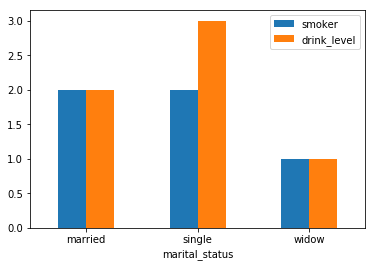

In [36]:
#plotting for marital status vs smoker n drinklevel.
F7rep.groupby('marital_status')['smoker','drink_level'].nunique().plot.bar(rot=0)

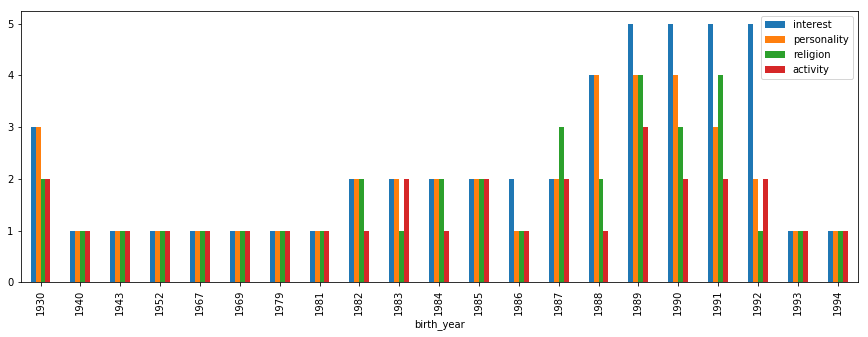

In [37]:
#plot to visualize user's personal info based on birthyear.
F7repplt=F7rep.groupby('birth_year')['interest','personality','religion','activity'].nunique().plot.bar(figsize=(15, 5))

In [38]:
#now performing label encoding to convert char to factors.
F7char=F7rep.select_dtypes(include=['object'])

encoder = LabelEncoder()
F7charLE = F7char.apply(encoder.fit_transform, axis=1)
F7charLE=F7charLE.drop(['userID'],axis=1)

F7charLE[['userID','latitude','longitude','birth_year','weight','height']]=F7rep[['userID','latitude','longitude','birth_year','weight','height']]
F7charLE.head()

,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,interest,personality,religion,activity,color,budget,userID,latitude,longitude,birth_year,weight,height
0,3,1,6,4,9,10,5,13,12,8,11,2,7,U1001,22.139997,-100.978803,1989,69,1.77
1,3,2,7,4,9,11,6,13,5,0,12,10,8,U1002,22.150087,-100.983325,1990,40,1.87
2,3,12,5,4,10,11,7,9,6,0,13,2,8,U1003,22.119847,-100.946527,1989,60,1.69
3,2,1,7,3,11,12,6,13,5,9,10,4,8,U1004,18.867000,-99.183000,1940,44,1.53
4,4,2,8,5,10,11,6,9,13,0,12,3,7,U1005,22.183477,-100.959891,1992,65,1.69


# F8 - geoplaces2.csv

In [39]:
F8.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [40]:
F8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 21 columns):
placeID           130 non-null int64
latitude          130 non-null float64
longitude         130 non-null float64
the_geom_meter    130 non-null object
name              130 non-null object
address           130 non-null object
city              130 non-null object
state             130 non-null object
country           130 non-null object
fax               130 non-null object
zip               130 non-null object
alcohol           130 non-null object
smoking_area      130 non-null object
dress_code        130 non-null object
accessibility     130 non-null object
price             130 non-null object
url               130 non-null object
Rambience         130 non-null object
franchise         130 non-null object
area              130 non-null object
other_services    130 non-null object
dtypes: float64(2), int64(1), object(18)
memory usage: 21.4+ KB


In [41]:
#replacing unknown value with Nan.
F8rep=F8.replace('?', np.nan)

In [42]:
#now we are finding missing value cnt n perct for all variables.
mss=F8rep.isnull().sum()
columns = F8rep.columns
percent_missing = F8rep.isnull().sum() * 100 / len(F8rep)
missing_value_F8rep = pd.DataFrame({'missing_cnt':mss,
                                 'percent_missing': percent_missing})
missing_value_F8rep

,missing_cnt,percent_missing
placeID,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
the_geom_meter,0,0.000000
name,0,0.000000
address,27,20.769231
city,18,13.846154
state,18,13.846154
country,28,21.538462
fax,130,100.000000


In [43]:
#dropping columns with more than 50% missing values
F8new=F8rep.drop(['fax','zip','url'],axis=1)
#and replacing remaining colvalues with mode
for column in F8new.columns:
    F8new[column].fillna(F8new[column].mode()[0], inplace=True)

since some variables contains dirty values, we are going to perform data cleaning on those variables.

In [44]:
#clean n cnt of city
F8new.city=F8new.city.apply(lambda x: x.lower())
F8new.city=F8new.city.apply(lambda x:''.join([i for i in x 
                            if i not in string.punctuation]))

F8new.city.value_counts()

san luis potosi     87
cuernavaca          16
victoria            10
jiutepec             4
slp                  3
soledad              2
ciudad victoria      2
cd victoria          2
victoria             2
san luis potosi      1
san luis potos       1
Name: city, dtype: int64

In [45]:
#replacing city with unique. 
F8new['city']=F8new['city'].replace(['san luis potos','san luis potosi','slp','san luis potosi '],'san luis potosi' )
F8new['city']=F8new['city'].replace(['victoria','cd victoria','victoria '],'ciudad victoria' )
F8new.city.value_counts()

san luis potosi    92
cuernavaca         16
ciudad victoria    16
jiutepec            4
soledad             2
Name: city, dtype: int64

In [46]:
#clean n cnt of state
F8new.state=F8new.state.apply(lambda x: x.lower())
F8new.state=F8new.state.apply(lambda x:''.join([i for i in x 
                            if i not in string.punctuation]))

F8new.state.value_counts()

slp                73
morelos            20
san luis potosi    18
tamaulipas         16
mexico              2
san luis potos      1
Name: state, dtype: int64

In [47]:
#replacing state with unique.
F8new['state']=F8new['state'].replace(['san luis potos','san luis potosi','slp'],'san luis potosi' )
F8new.state.value_counts()

san luis potosi    92
morelos            20
tamaulipas         16
mexico              2
Name: state, dtype: int64

In [48]:
#clean n cnt of country
F8new.country=F8new.country.apply(lambda x: x.lower())
F8new.country=F8new.country.apply(lambda x:''.join([i for i in x 
                            if i not in string.punctuation]))

F8new.country.value_counts()

mexico    130
Name: country, dtype: int64

In [49]:
#label encoding
F8char=F8new.select_dtypes(include=['object'])
F8charLE = F8char.apply(encoder.fit_transform, axis=1)
F8charLE[['placeID','latitude','longitude']]=F8new[['placeID','latitude','longitude']]
F8charLE.head()

,the_geom_meter,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,placeID,latitude,longitude
0,0,1,3,5,11,10,2,13,8,12,9,7,6,4,13,134999,18.915421,-99.184871
1,0,11,3,12,12,8,1,9,6,2,7,5,4,10,9,132825,22.147392,-100.983092
2,0,1,2,13,13,8,3,10,6,12,7,5,4,11,9,135106,22.149709,-100.976093
3,0,8,2,3,13,10,1,11,7,5,9,6,12,4,11,132667,23.752697,-99.163359
4,0,2,8,3,14,10,1,12,7,5,9,6,13,4,11,132613,23.752903,-99.165076


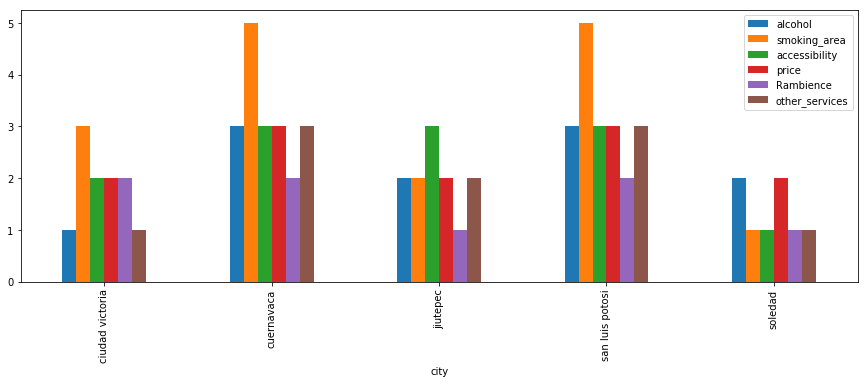

In [50]:
#plot for facilities provided by Restaurants based on city.
F8newplt=F8new.groupby('city')['alcohol','smoking_area','accessibility','price','Rambience','other_services'].nunique().plot.bar(figsize=(15,5))

Producing Map location for the Restaurants

In [52]:
mapbox_access_token='pk.eyJ1IjoibmF2ZWVuOTIiLCJhIjoiY2pqbWlybTc2MTlmdjNwcGJ2NGt1dDFoOSJ9.z5Jt4XxKvu5voCJZBAenjQ'

In [61]:
mcd=F8rep[F8rep.country =='Mexico']
mcd_lat = mcd.latitude
mcd_lon = mcd.longitude

data = [
    go.Scattermapbox(
        lat=mcd_lat,
        lon=mcd_lon,
        mode='markers',
        marker=dict(
            size=6,
            color='rgb(255, 0, 0)',
            opacity=0.4
        ))]
layout = go.Layout(
    title='Restaurants Locations',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=23,
            lon=-102
        ),
        pitch=2,
        zoom=4.5,
        style='dark'
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='restaurants')

# Merging multiple files into one

In [62]:
#merging ratingfile(T) with userprofile(F7)
A=pd.merge(T,F7charLE)

In [63]:
#merging A with userpayments(F6) 
B=pd.merge(A,F6dum1,how='left',on=['userID'])

In [64]:
#merging B with usercuisine(F5)
C=pd.merge(B,F5dum1,how='left',on=['userID'])

In [65]:
#merging C with geoplaces2(F8)
D=pd.merge(C,F8charLE,how='left',on=['placeID'])

In [66]:
#merging D with chefmozparking(F4)
E=pd.merge(D,F4dum1,how='left',on=['placeID'])

In [67]:
#merging E with chefmozcuisine(F2)
F=pd.merge(E,F2dum1,how='left',on=['placeID'])

In [68]:
#merging F with chefmozaccepts(F1)
G=pd.merge(F,F1dum1,how='left',on=['placeID'])

In [69]:
len(G)

1161

# Final Data

In [70]:
G.head()

,userID,placeID,rating,food_rating,service_rating,smoker,drink_level,dress_preference,ambience,transport,...,Rpayment_Diners_Club,Rpayment_Discover,Rpayment_Japan_Credit_Bureau,Rpayment_MasterCard-Eurocard,Rpayment_VISA,Rpayment_Visa,Rpayment_bank_debit_cards,Rpayment_cash,Rpayment_checks,Rpayment_gift_certificates
0,U1077,135085,2,2,2,4,10,3,5,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,U1077,135038,2,2,1,4,10,3,5,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,U1077,132825,2,2,2,4,10,3,5,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,U1077,135060,1,2,2,4,10,3,5,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,U1077,135027,0,1,1,4,10,3,5,9,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [71]:
G.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1160
Columns: 226 entries, userID to Rpayment_gift_certificates
dtypes: float64(81), int64(34), object(1), uint8(110)
memory usage: 1.2+ MB


In [72]:
print('No of columns',G.shape[1])
print('No of rows',G.shape[0])

No of columns 226
No of rows 1161


In [73]:
#check for Null values
G.isnull().values.any()

True

In [74]:
#finding percentage of null values across columns
columns = G.columns
percent_missing = G.isnull().sum() * 100 / len(G)
missing_value_G = pd.DataFrame({'percent_missing': percent_missing})
missing_value_G

,percent_missing
userID,0.000000
placeID,0.000000
rating,0.000000
food_rating,0.000000
service_rating,0.000000
smoker,0.000000
drink_level,0.000000
dress_preference,0.000000
ambience,0.000000
transport,0.000000


In [75]:
#replacing missing values with zero and check.
G=G.fillna(0)
G.isnull().values.any()

False

In [76]:
#for modelling purpose we are label encoding userID.
G['userID']=encoder.fit_transform(G['userID'])

# Model Building

In [77]:
#packages for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

C:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [78]:
# splitting train and test data as 75/25.
X=G.drop(['placeID','rating','food_rating','service_rating'],axis=1)
y=G['rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

##Logistic Regression

In [79]:
#model building.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
#predicting on test data.
predictions1 =  logmodel.predict(X_test)

In [81]:
print("confusion matrix")
print(confusion_matrix(y_test,predictions1))
print("Accuracy_score")
print(accuracy_score(y_test, predictions1))

confusion matrix
[[16 24 16]
 [ 7 57 45]
 [ 3 46 77]]
Accuracy_score
0.5154639175257731


In [82]:
print("classification_report")
print(classification_report(y_test,predictions1))

classification_report
             precision    recall  f1-score   support

          0       0.62      0.29      0.39        56
          1       0.45      0.52      0.48       109
          2       0.56      0.61      0.58       126

avg / total       0.53      0.52      0.51       291



In [83]:
#kappa score.
cohen_kappa_score(y_test, predictions1)

0.21085125206754618

##Decision Tree

In [85]:
#model building.
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [86]:
#predicting on test data.
predictions2 =  clf.predict(X_test)

In [87]:
print("confusion matrix")
print(confusion_matrix(y_test,predictions2))
print("Accuracy_score")
print(accuracy_score(y_test, predictions2))

confusion matrix
[[29 18  9]
 [18 53 38]
 [12 40 74]]
Accuracy_score
0.5360824742268041


In [88]:
print("classification_report")
print(classification_report(y_test,predictions2))

classification_report
             precision    recall  f1-score   support

          0       0.49      0.52      0.50        56
          1       0.48      0.49      0.48       109
          2       0.61      0.59      0.60       126

avg / total       0.54      0.54      0.54       291



In [89]:
#kappa score.
cohen_kappa_score(y_test, predictions2)

0.272930855789162

##Random Forest

In [90]:
#model building.
Rndclf = RandomForestClassifier(max_depth=2, random_state=0) 
Rndclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [91]:
#predicting on test data.
predictions3 = Rndclf.predict(X_test)

In [92]:
print("confusion matrix")
print(confusion_matrix(y_test,predictions3))
print("Accuracy_score")
print(accuracy_score(y_test, predictions3))

confusion matrix
[[  3  12  41]
 [  0  29  80]
 [  0  10 116]]
Accuracy_score
0.5085910652920962


In [93]:
print("classification_report")
print(classification_report(y_test,predictions3))

classification_report
             precision    recall  f1-score   support

          0       1.00      0.05      0.10        56
          1       0.57      0.27      0.36       109
          2       0.49      0.92      0.64       126

avg / total       0.62      0.51      0.43       291



In [94]:
#kappa score.
cohen_kappa_score(y_test, predictions3)

0.15234661451967724

##XGboost model

In [95]:
#model building.
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [96]:
#predicting on test data.
predictions4 = xgb.predict(X_test)

C:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [97]:
print("confusion matrix")
print(confusion_matrix(y_test,predictions4))
print("Accuracy_score")
print(accuracy_score(y_test, predictions4))

confusion matrix
[[28 16 12]
 [ 4 66 39]
 [ 1 36 89]]
Accuracy_score
0.6288659793814433


In [98]:
print("classification_report")
print(classification_report(y_test,predictions4))

classification_report
             precision    recall  f1-score   support

          0       0.85      0.50      0.63        56
          1       0.56      0.61      0.58       109
          2       0.64      0.71      0.67       126

avg / total       0.65      0.63      0.63       291



In [99]:
#kappa score.
cohen_kappa_score(y_test, predictions4)

0.39943819151172344

# By Comparing the above built models, we find that XGboost is giving better predictions based on Accuracy,F1-score and kappa score.
